In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import os

In [2]:
base_path = os.getcwd().split('scripts')[0]
model_funcs_path = base_path + 'funcs+params_Andromeda5/'

In [3]:
def B(R, w):
    return w[0]*np.exp(-R/w[1]) + w[2]*np.exp(-R/w[3])
def chi2(w, *args):
    d, R, e = args
    return np.sum((d-B(R, w))**2/e**2)

In [4]:
d = np.array([15, 19, 7.3, 7.5, 7.1, 6.3, 0.15])
e = np.array([3, 3, .2*d[2], .2*d[3], .2*d[4], .2*d[5], 0.15])
R = np.array([.3, .9, 7, 9, 11, 13, 300])
w_init = [11, 1.5, 9, 40]

In [5]:
#print initial statistics
this_chi2 = chi2(w_init, *(d, R,  e))
statement1 = 'initial weights are: '
for j in range(len(w_init)):
    statement1 += 'w' + str(j) + ' = ' + str(w_init[j]) + '; '
print(statement1)
print('chi^2 = ' + str(this_chi2))

# update weights
bnds = [(0, 50), (0, 200), (0, 50), (0 , 500)]
res = minimize(chi2, w_init, args=(d, R, e), bounds=bnds)

w_fin = res.x
print('w_fin: ', w_fin)
print(res.success)
print(res.message)
chi2_final = chi2(w_fin, *(d, R, e))
print('final chi2: '+ str(chi2_final)) 

initial weights are: w0 = 11; w1 = 1.5; w2 = 9; w3 = 40; 
chi^2 = 3.975983415518556
w_fin:  [11.18327545  3.45741525  7.20414034 77.63481584]
True
CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
final chi2: 2.2107457230766694


Text(0.5, 0, '$R \\; \\rm(kpc)$')

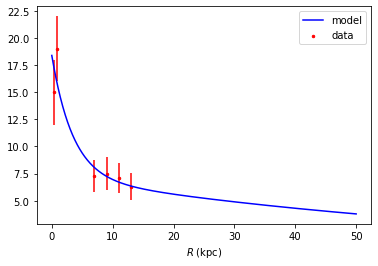

In [6]:
R_grid = np.linspace(0, 50, 1000)
B_best = B(R_grid, w_fin)
fig = plt.figure()
plt.errorbar(R[:-1], d[:-1], yerr=e[:-1], fmt='none', color='r')
plt.scatter(R[:-1], d[:-1], s=6, color='r', label='data')
plt.plot(R_grid, B_best, color='b', label='model')
plt.legend()
plt.xlabel(r'$R \; \rm(kpc)$')

In [7]:
np.save(model_funcs_path + 'B_params.npy', np.array(w_fin).reshape(2,2))

In [8]:
arrays_path = base_path +'fig_arrays/'
tex_label = 'magnetic_field_disk'
np.save(arrays_path + tex_label + '__Bparams.npy', np.array(w_fin))
np.save(arrays_path + tex_label + '__Bmeas.npy', d)
np.save(arrays_path + tex_label + '__Berr.npy', e)
np.save(arrays_path + tex_label + '__R.npy', R)


In [45]:
from iminuit import Minuit
from iminuit import cost
def model(R, B0, R0, B1, R1):
    return B0*np.exp(-R/R0) + B1*np.exp(-R/R1)

c = cost.LeastSquares(R, d, e, model)
w_init = 11, 3, 7, 70
m = Minuit(c, *w_init)
m.migrad()
m.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 2.211 (chi2/ndof = 0.7)    │              Nfcn = 91               │
│ EDM = 0.000197 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ B0   │   11.2    │    2.9    │            │            │         │         │       │
│ 1 │ R0   │    3.4    │    2.6    │            │            │         │         │       │
│ 2 │ B1   │    7.2    │    1.9    │            │            │         │         │       │
│ 3 │ R1   │    77     │    21     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────┐
│    │    B0    R0    B1    R1 │
├────┼─────────────────────────┤
│ B0 │  8.62 0.667 -1.99  12.2 │
│ R0 │ 0.667  6.77 -4.24  13.9 │
│ B1 │ -1.99 -4.24  3.59 -16.8 │
│ R1 │  12.2  13.9 -16.8   460 │
└────┴─────────────────────────┘

In [46]:
m.values

<ValueView B0=11.175786119626894 R0=3.4254439505291088 B1=7.230657961859057 R1=77.49932087240859>

In [44]:
m.errors

<ErrorView B0=2.936719815482729 R0=2.602717833015506 B1=1.8935095417760377 R1=21.456188417250665>

In [57]:
#D=(2*2.3 + 1.2)/3
D = (2*.9 + .45)/3
#D=(2*3.1 + 1.5)/3
#D = (2*.8 + .41)/3
E = 4.1
B = 6.6
D0 = D*(10/B)**(-1/3)*E**(-1/3)
print(D0)

0.4079885324652655
